# Progetto Visualizzazione Scientifica
### Autori 
Simone Alessandro Casciaro 987303<br>
Michela Francesca Firrera 02022A

### Scaletta
- Introduzione
    - 1 slide su spiegazione di cos'è un GP
    - Chi ha vinto più GP? (Piloti e Costruttori)
    - Distribuzione delle vittorie del miglior pilota (L. Hamilton) e della migliore squadra (Ferrari)
        - Appunto sul dire che Hamilton non ha mai corso in Ferrari
- Com'è strutturato un GP?
    - Slide che mostra il format classico: FP1, FP2, FP3, Q1, Q2, Q3 e R
- Inizio Analisi GP (Suzuka)
    - Studio delle FP1
    - Studio delle FP2
    - Studio delle FP3
        ...
- Introduzione format alternativo
    - Slide che mostra il format Sprint: FP1, Q1, Q2, Q3, SQ1, SQ2, SQ3, SR, R
    - Come cambia l'analisi di un GP nei format Sprint?
        ...
- Domande finali
    - Troveremo domande in corso d'opera alla quale rispondere con ulteriori grafici
- Conclusione

### Fonti
- Dataset http://ergast.com/mrd/
- Stile Grafici https://docs.fastf1.dev/plotting.html
- Telemetrie https://docs.fastf1.dev/core.html

### Apertura File

In [1]:
import pandas as pd

points = pd.read_csv('Dataset/constructor_standings.csv')
results = pd.read_csv('Dataset/results.csv')
constructors = pd.read_csv('Dataset/constructors.csv')
drivers = pd.read_csv('Dataset/drivers.csv')
races = pd.read_csv('Dataset/races.csv')
circuits = pd.read_csv('Dataset/circuits.csv')

# Introduzione
### Chi ha vinto più GP in F1?

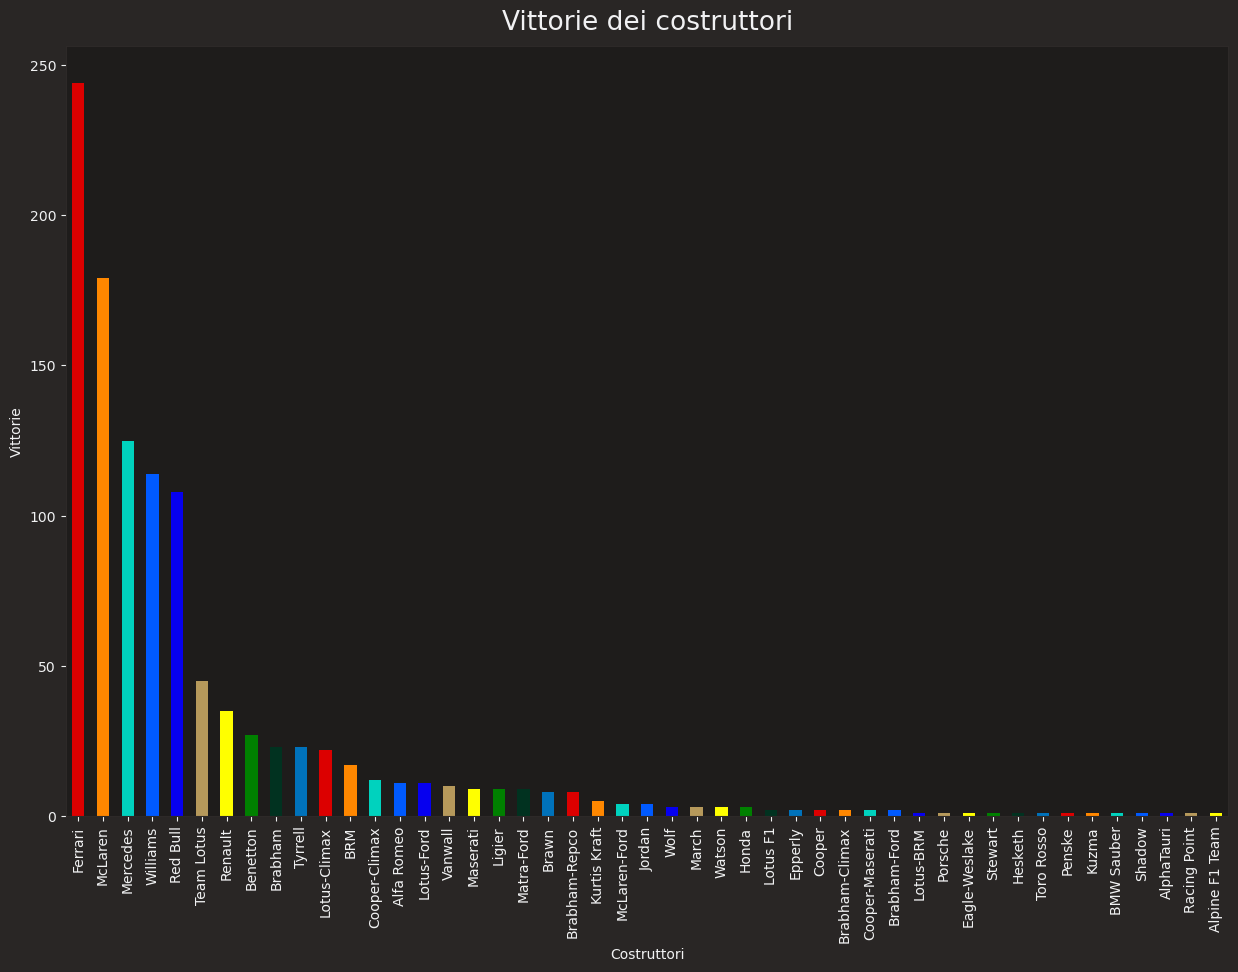

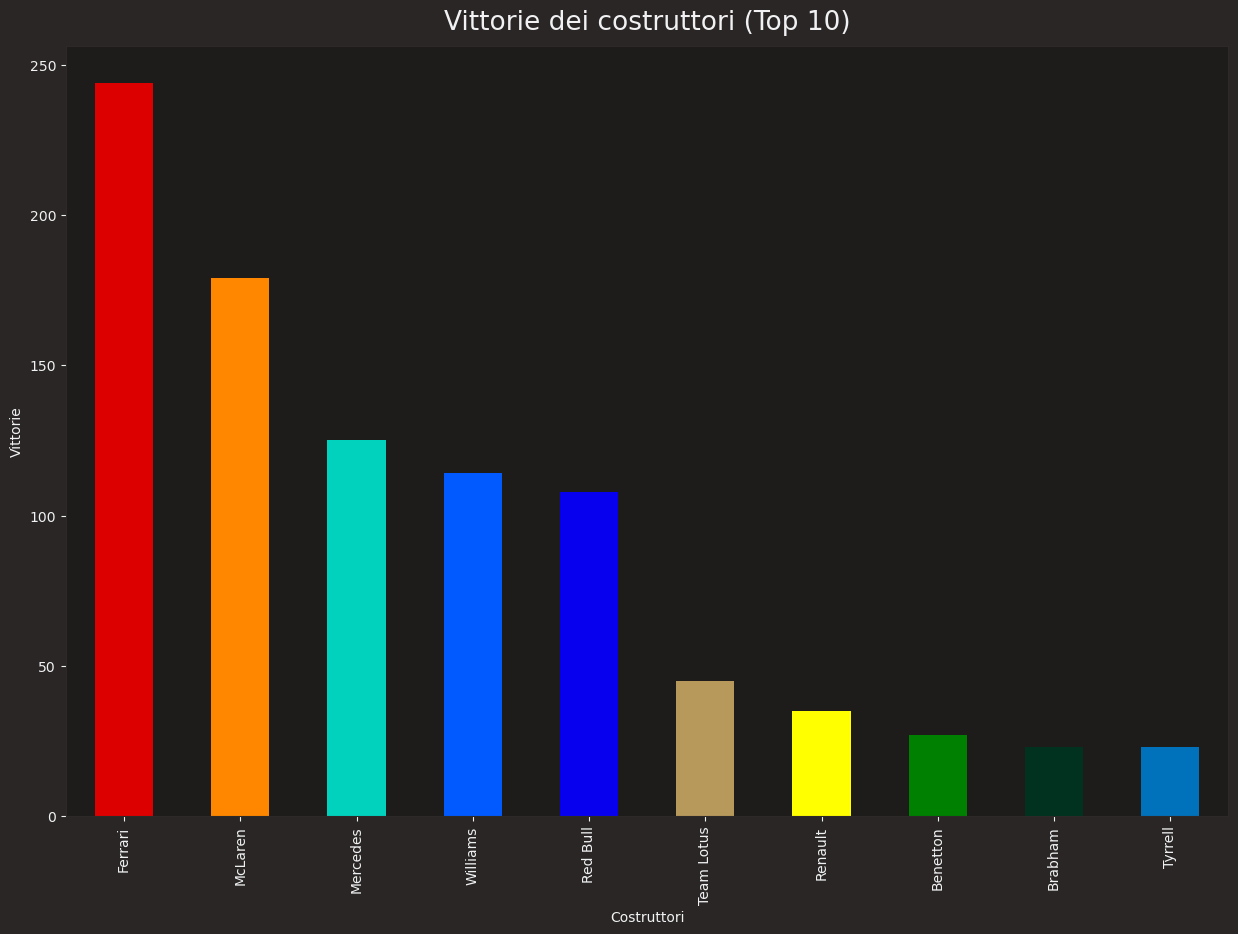

In [2]:
import matplotlib.pyplot as plt
import fastf1.plotting as f1p
import numpy as np

f1p.setup_mpl()

plt.rc('figure', figsize=(15.0, 10.0))

c_wins = results[results['positionOrder']==1].merge(constructors, on = 'constructorId')

colorStyle = [
    f1p.team_color('Fer'), # Ferrari
    f1p.team_color('Mcl'), # McLaren
    f1p.team_color('Mer'), # Mercedes
    f1p.team_color('Wil'), # Williams
    f1p.team_color('Rbr'), # Red Bull
    '#B6995B', # Lotus
    '#ffff00', # Renault
    '#008000', # Benetton
    '#013220', # Brabham
    '#0072bb', # Tyrrell
]

plt.xlabel('Costruttori')
plt.ylabel('Vittorie')
plt.title('Vittorie dei costruttori')
c_wins['name'].value_counts().plot.bar(color = colorStyle)
plt.show()

plt.xlabel('Costruttori')
plt.ylabel('Vittorie')
plt.title('Vittorie dei costruttori (Top 10)')
c_wins['name'].value_counts()[:10].plot.bar(color = colorStyle)
plt.show()

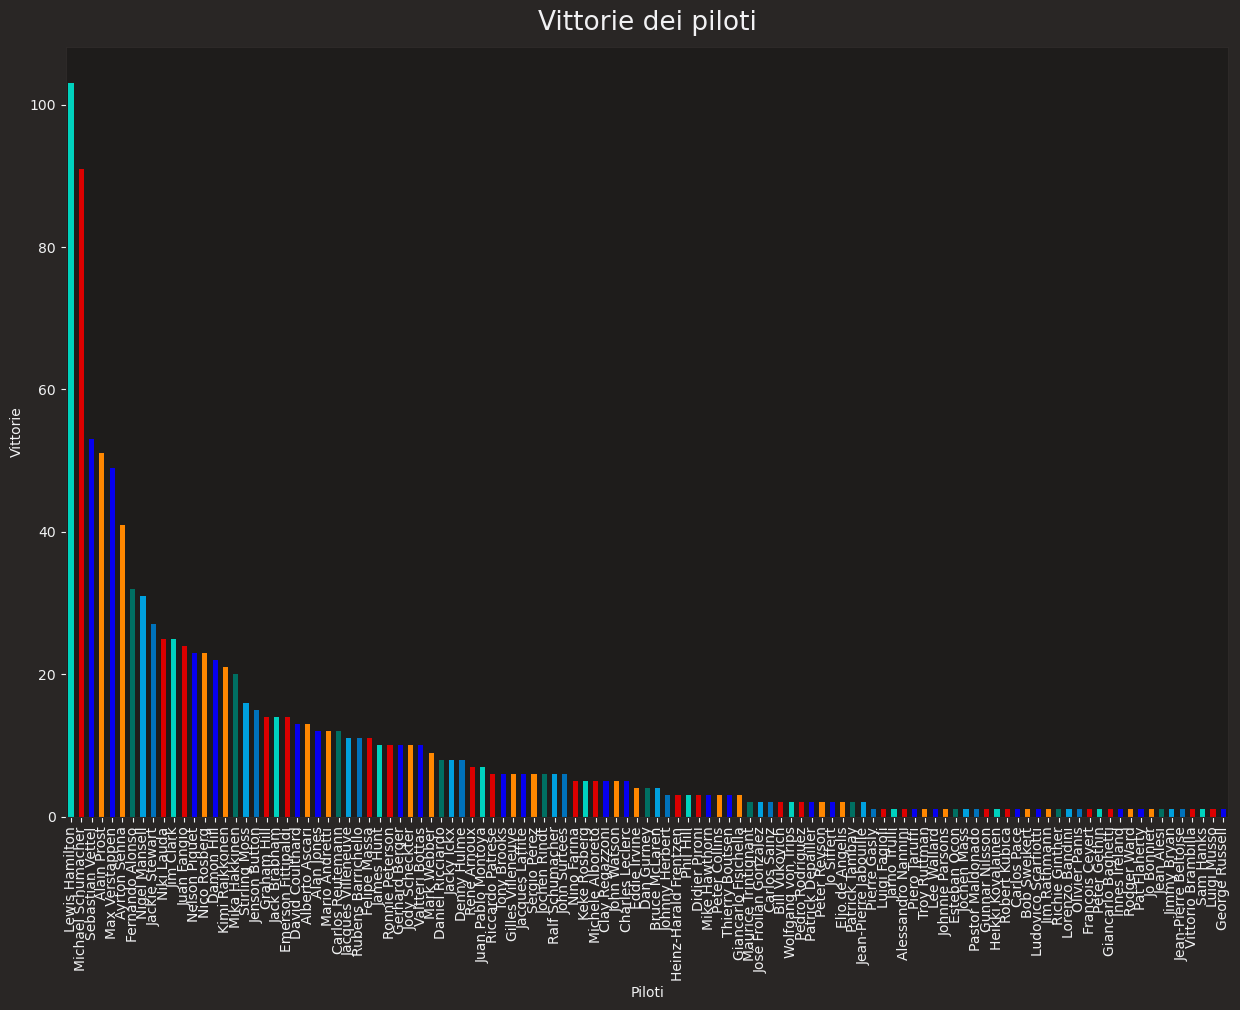

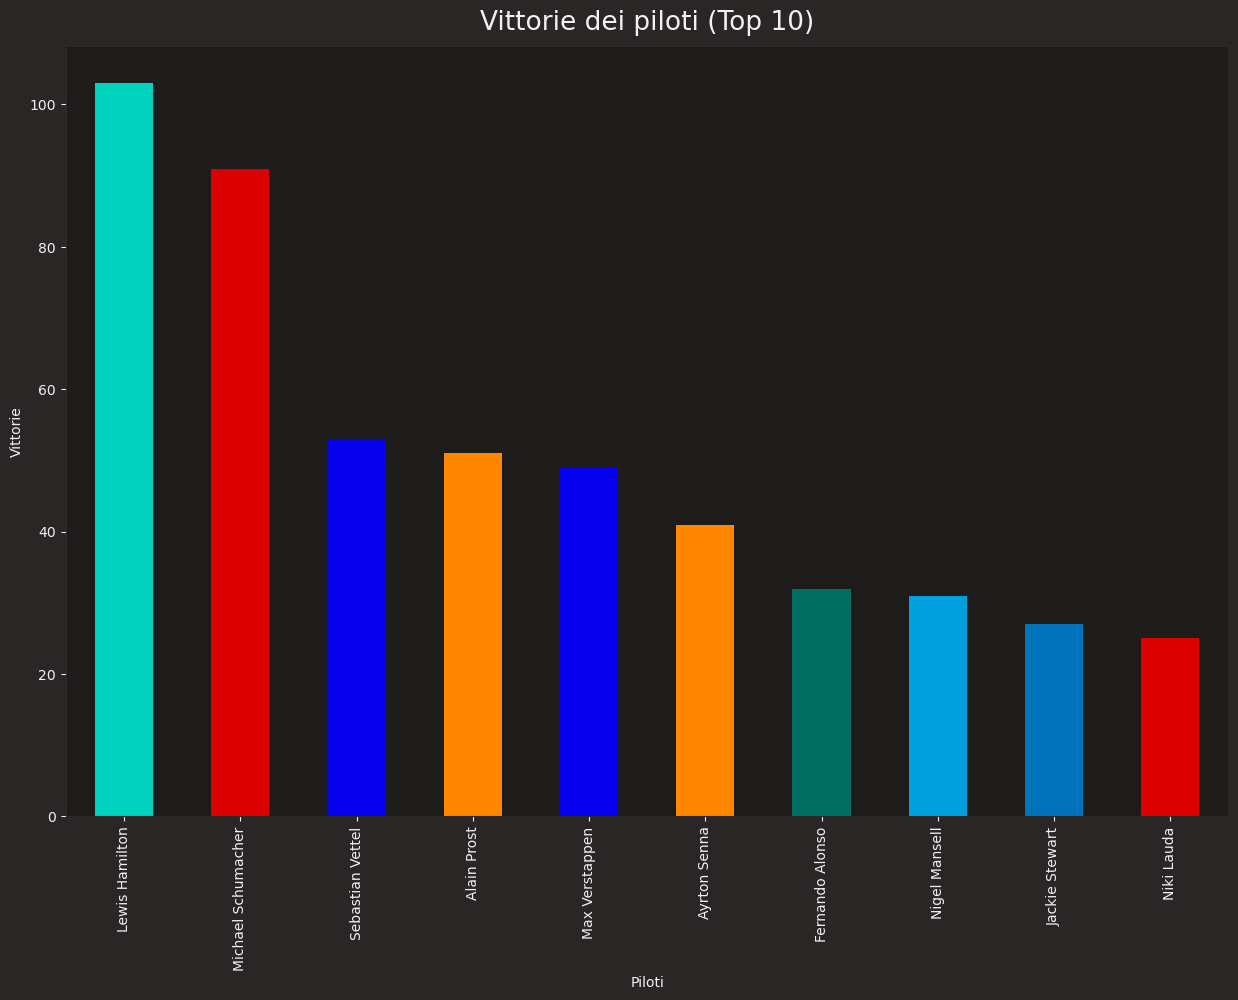

In [3]:
d_wins = results[results['positionOrder']==1].merge(drivers, on = 'driverId')
complete_name = d_wins['forename'] + ' ' + d_wins['surname']
d_wins['complete_name'] = complete_name

colorStyle = [
    f1p.driver_color('Ham'), # Hamilton (Mercedes 2023)
    f1p.team_color('Fer'), # Schumacher (Ferrari 2004)
    f1p.team_color('Rbr'), # Vettel (Red Bull 2013)
    f1p.team_color('Mcl'), # Prost (McLaren 1988)
    f1p.driver_color('Ver'), # Verstappen (Red Bull 2023)
    f1p.team_color('Mcl'), # Senna (McLaren 1988)
    f1p.driver_color('Alo'), # Alonso (Aston Martin 2023)
    '#00A0DE', # Mansell (Williams 1992)
    '#0072bb', # Steward (Tyrrell 1973)
     f1p.team_color('Fer'), # Lauda (Ferrari 1977) 
]

plt.xlabel('Piloti')
plt.ylabel('Vittorie')
plt.title('Vittorie dei piloti')
d_wins['complete_name'].value_counts().plot.bar(color = colorStyle) 
plt.show()

plt.xlabel('Piloti')
plt.ylabel('Vittorie')
plt.title('Vittorie dei piloti (Top 10)')
d_wins['complete_name'].value_counts()[:10].plot.bar(color = colorStyle) # Limit 10 per visualizzazione del grafico
plt.show()

### Grafico a torta dei vincitori

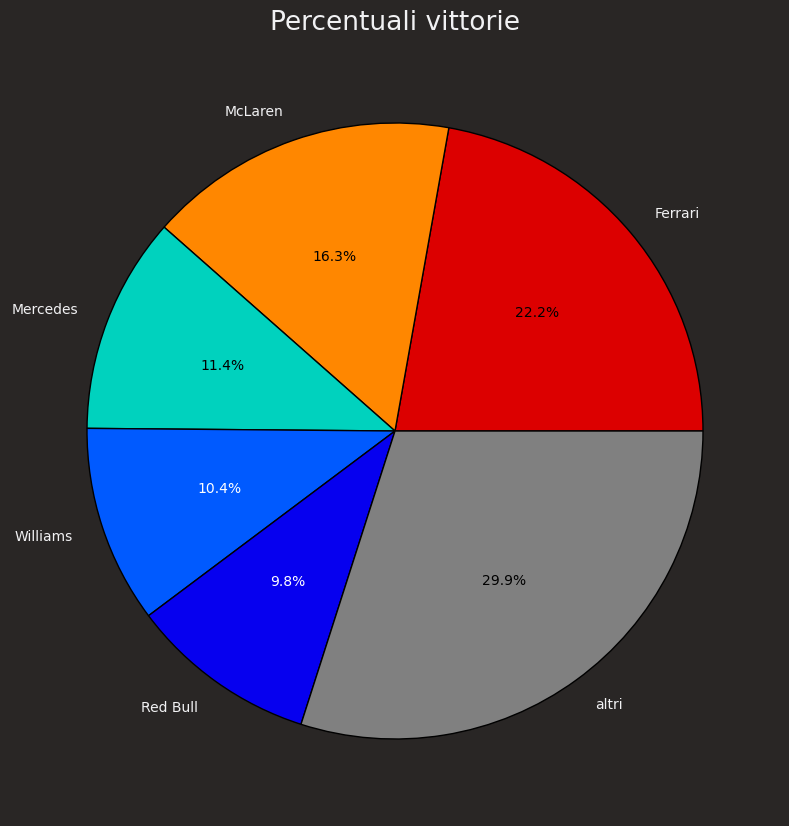

In [4]:
vc = c_wins['name'].value_counts().head(5)
others = pd.Series(c_wins['name'].value_counts()[5:].sum(), index = ['altri'])
pie = pd.concat([vc, others])

colorStyle = [
    f1p.team_color('Fer'), # Ferrari
    f1p.team_color('Mcl'), # McLaren
    f1p.team_color('Mer'),
    f1p.team_color('Wil'),
    f1p.team_color('Rbr'),
    'grey'
]

plt.title('Percentuali vittorie')
explode = [0.0, 0.0, 0, 0, 0, 0]
pie_wedges, texts, autotexts = plt.pie(pie, labels=pie.index, colors = colorStyle, autopct='%1.1f%%', explode = explode, wedgeprops = {'edgecolor': 'black'})
for autotext in autotexts:
    autotext.set_color('black')
autotexts[3].set_color('white')
autotexts[4].set_color('white')

### Quando hanno vinto i 5 team più vincenti?

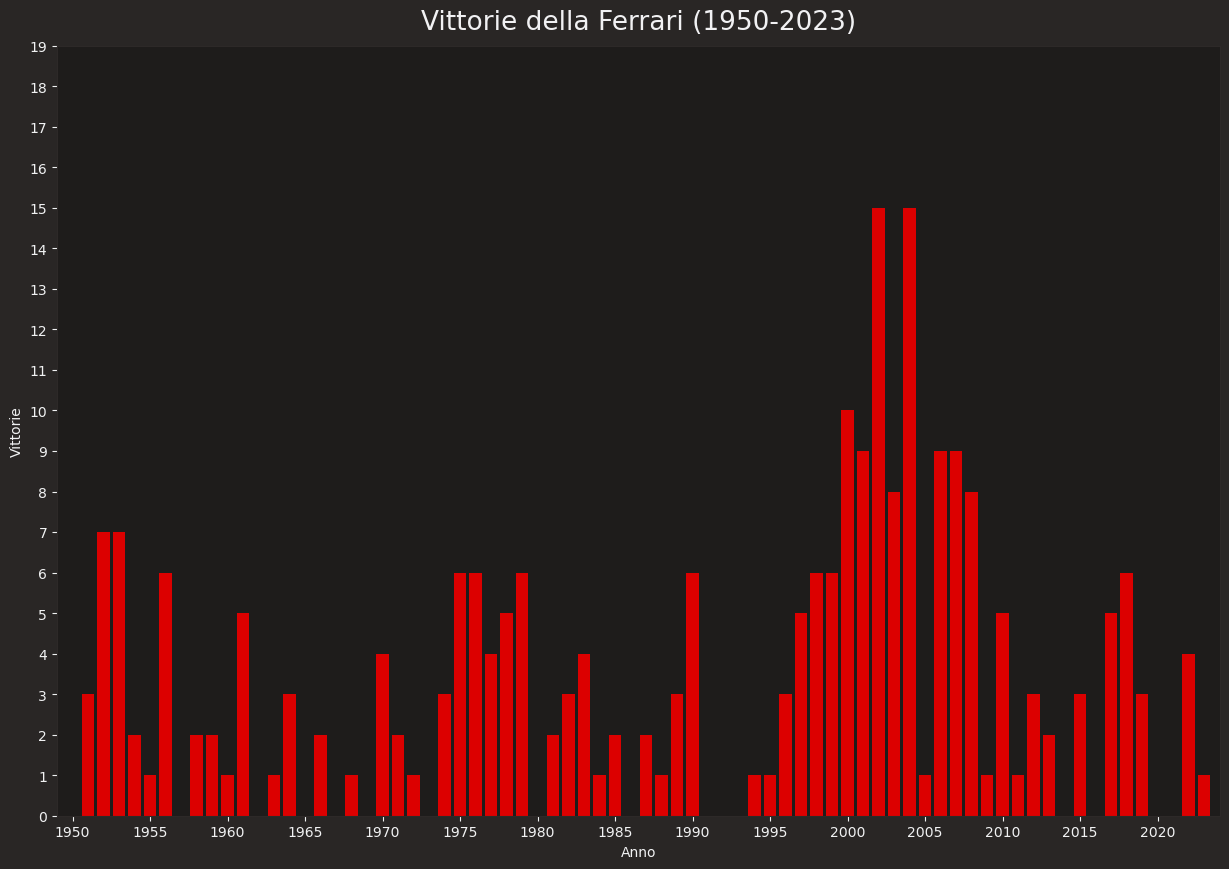

In [5]:
idTeam = 6 # Ferrari
fer_wins = results[(results['constructorId'] == idTeam) & (results['positionOrder'] == 1)].merge(races, on = 'raceId')

# Calcola il conteggio delle vittorie per ogni anno
fer_win_count = fer_wins['year'].value_counts().reset_index()
fer_win_count.columns = ['year', 'wins']

# Crea un DataFrame con tutti gli anni dal 1950 al 2023
fer_all_years = pd.DataFrame({'year': range(1950, 2024)})

# Fai il merge per assicurarti di avere tutte le etichette degli anni
fer_win_count = fer_all_years.merge(fer_win_count, on='year', how='left')

# Riempi i valori mancanti (quelli con 0 vittorie) con 0
fer_win_count['wins'].fillna(0, inplace=True)

# Ora puoi creare il grafico
plt.bar(fer_win_count['year'], fer_win_count['wins'], color = f1p.team_color('FER'))
plt.xlabel('Anno')
plt.ylabel('Vittorie')
plt.xlim(1949,2024)
plt.xticks(np.arange(1950, 2024, step=5))
plt.yticks(np.arange(0, 20, step=1))
plt.title('Vittorie della Ferrari (1950-2023)')
plt.show()

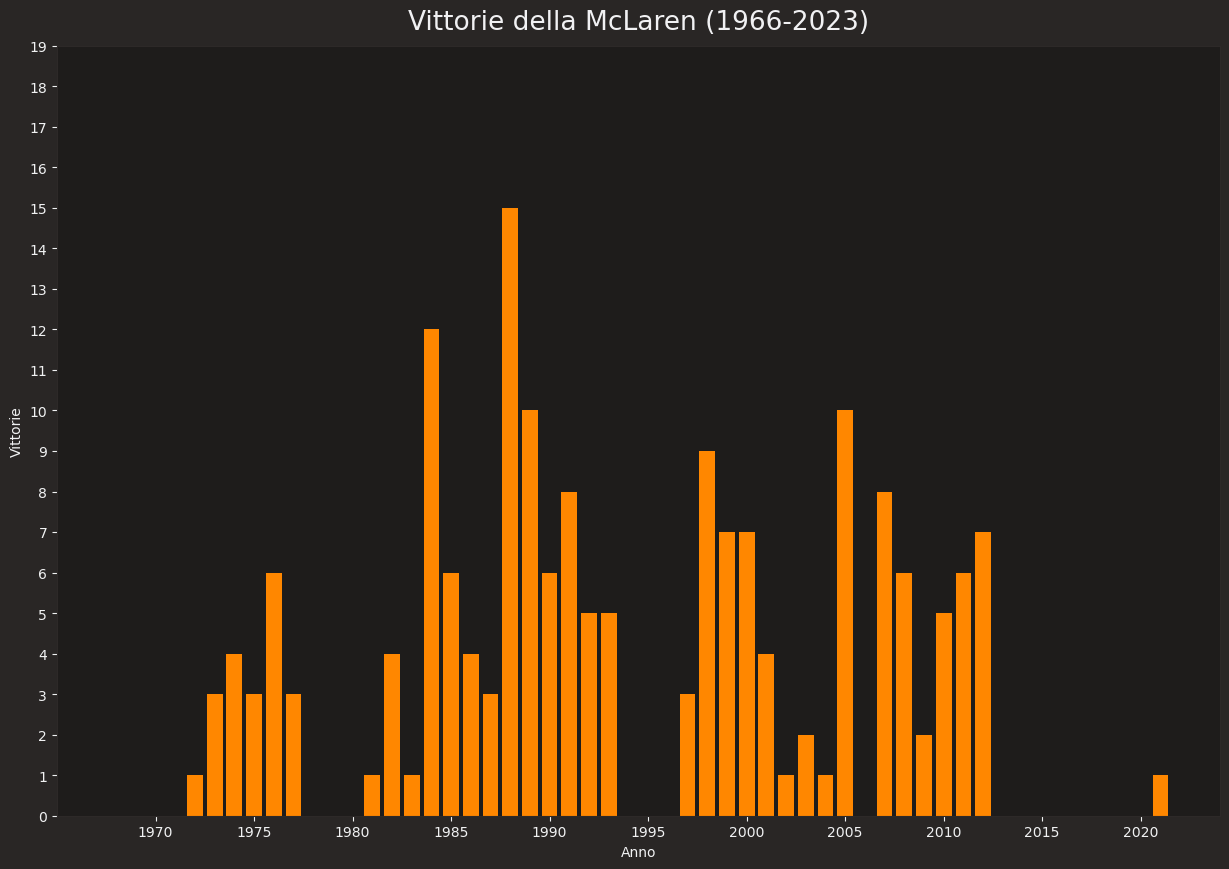

In [6]:
idTeam = 1 # McLaren
mcl_wins = results[(results['constructorId'] == idTeam) & (results['positionOrder'] == 1)].merge(races, on = 'raceId')

# Calcola il conteggio delle vittorie per ogni anno
mcl_win_count = mcl_wins['year'].value_counts().reset_index()
mcl_win_count.columns = ['year', 'wins']

# Crea un DataFrame con tutti gli anni dal 1950 al 2023
mcl_all_years = pd.DataFrame({'year': range(1966, 2024)})

# Fai il merge per assicurarti di avere tutte le etichette degli anni
mcl_win_count = mcl_all_years.merge(mcl_win_count, on='year', how='left')

# Riempi i valori mancanti (quelli con 0 vittorie) con 0
mcl_win_count['wins'].fillna(0, inplace=True)

# Ora puoi creare il grafico
plt.bar(mcl_win_count['year'], mcl_win_count['wins'], color = f1p.team_color('Mcl'))
plt.xlabel('Anno')
plt.ylabel('Vittorie')
plt.xlim(1965,2024)
plt.xticks(np.arange(1970, 2024, step=5))
plt.yticks(np.arange(0, 20, step=1))
plt.title('Vittorie della McLaren (1966-2023)')
plt.show()

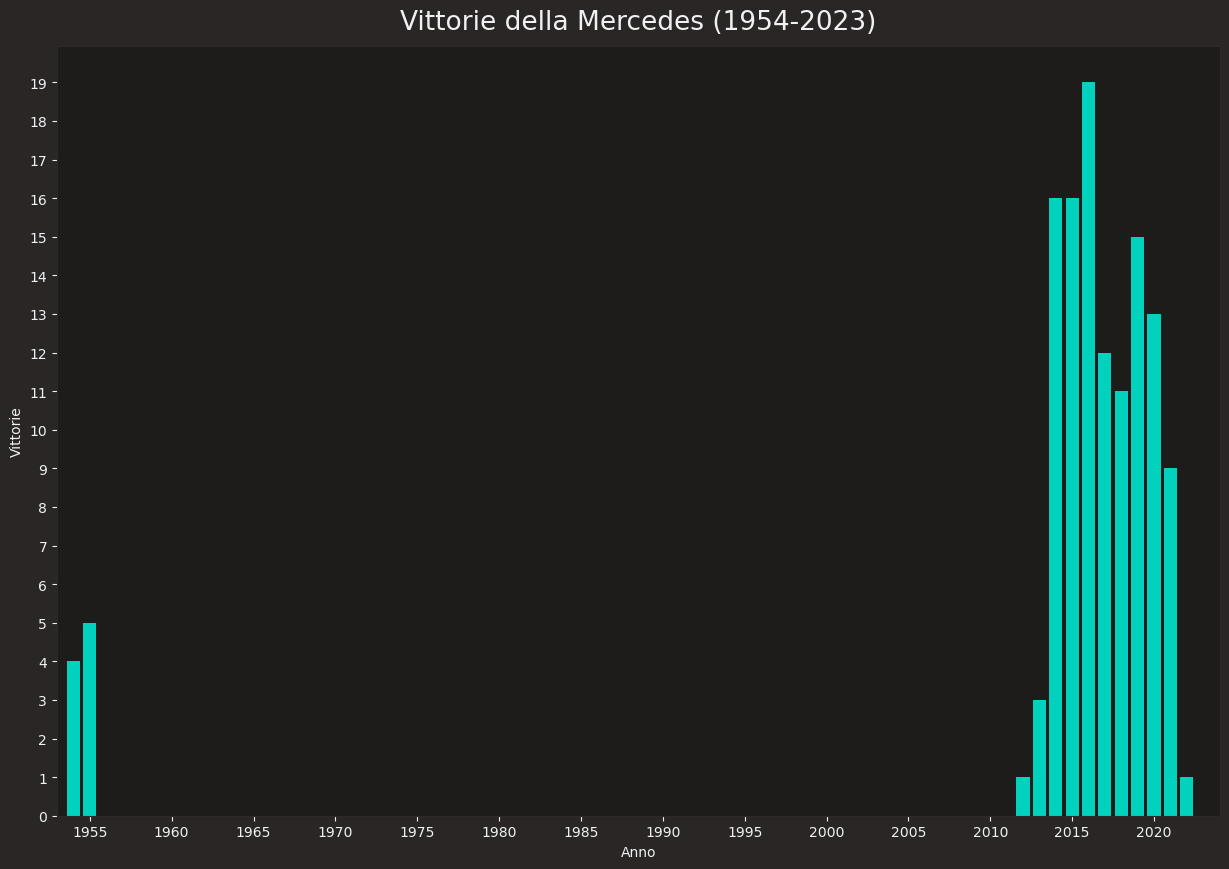

In [7]:
idTeam = 131 # Mercedes
mer_wins = results[(results['constructorId'] == idTeam) & (results['positionOrder'] == 1)].merge(races, on = 'raceId')

# Calcola il conteggio delle vittorie per ogni anno
mer_win_count = mer_wins['year'].value_counts().reset_index()
mer_win_count.columns = ['year', 'wins']

# Crea un DataFrame con tutti gli anni dal 1950 al 2023
mer_all_years = pd.DataFrame({'year': range(1954, 2024)})

# Fai il merge per assicurarti di avere tutte le etichette degli anni
mer_win_count = mer_all_years.merge(mer_win_count, on='year', how='left')

# Riempi i valori mancanti (quelli con 0 vittorie) con 0
mer_win_count['wins'].fillna(0, inplace=True)

# Ora puoi creare il grafico
plt.bar(mer_win_count['year'], mer_win_count['wins'], color = f1p.team_color('Mer'))
plt.xlabel('Anno')
plt.ylabel('Vittorie')
plt.xlim(1953,2024)
plt.xticks(np.arange(1955, 2024, step=5))
plt.yticks(np.arange(0, 20, step=1))
plt.title('Vittorie della Mercedes (1954-2023)')
plt.show()

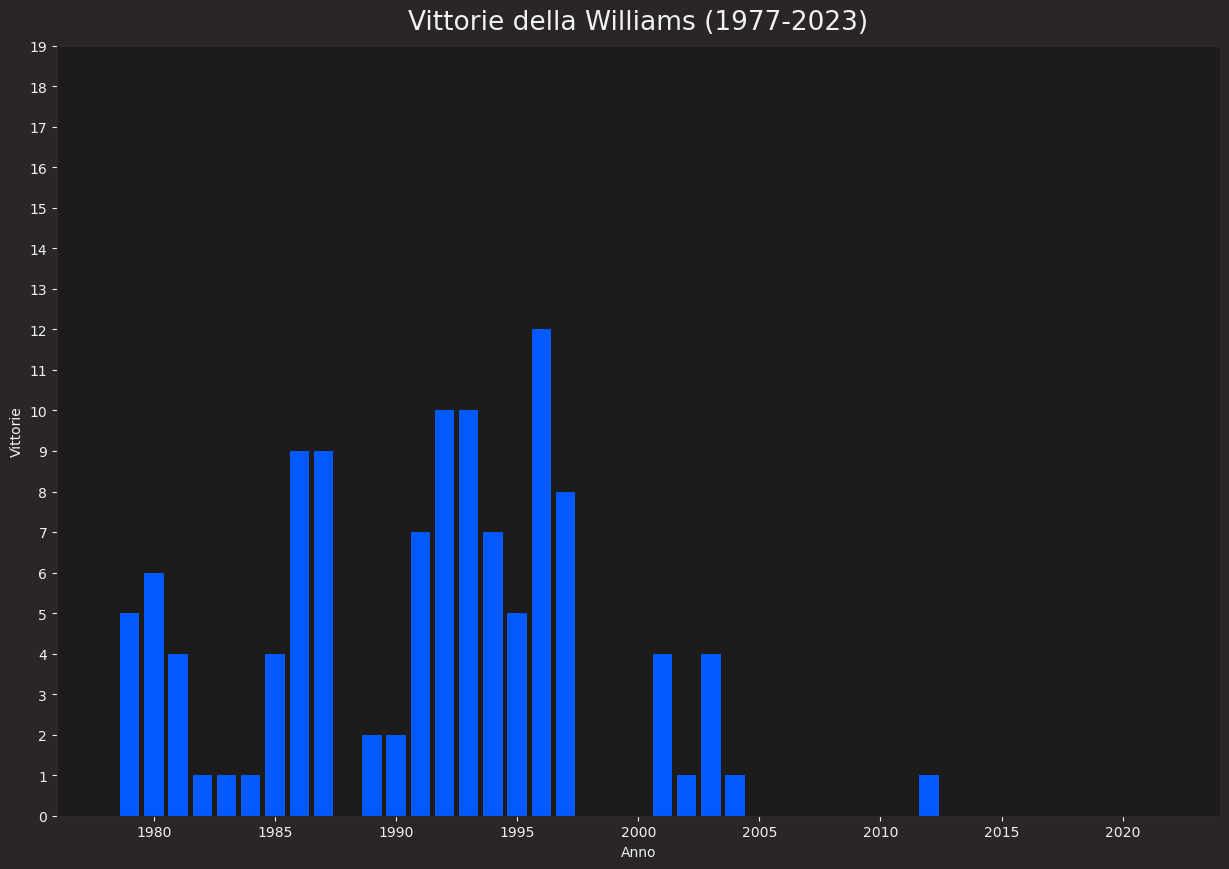

In [9]:
idTeam = 3 # Williams
wil_wins = results[(results['constructorId'] == idTeam) & (results['positionOrder'] == 1)].merge(races, on = 'raceId')

# Calcola il conteggio delle vittorie per ogni anno
wil_win_count = wil_wins['year'].value_counts().reset_index()
wil_win_count.columns = ['year', 'wins']

# Crea un DataFrame con tutti gli anni dal 1950 al 2023
wil_all_years = pd.DataFrame({'year': range(1977, 2024)})

# Fai il merge per assicurarti di avere tutte le etichette degli anni
wil_win_count = wil_all_years.merge(wil_win_count, on='year', how='left')

# Riempi i valori mancanti (quelli con 0 vittorie) con 0
wil_win_count['wins'].fillna(0, inplace=True)

# Ora puoi creare il grafico
plt.bar(wil_win_count['year'], wil_win_count['wins'], color = f1p.team_color('Wil'))
plt.xlabel('Anno')
plt.ylabel('Vittorie')
plt.xlim(1976,2024)
plt.xticks(np.arange(1980, 2024, step=5))
plt.yticks(np.arange(0, 20, step=1))
plt.title('Vittorie della Williams (1977-2023)')
plt.show()

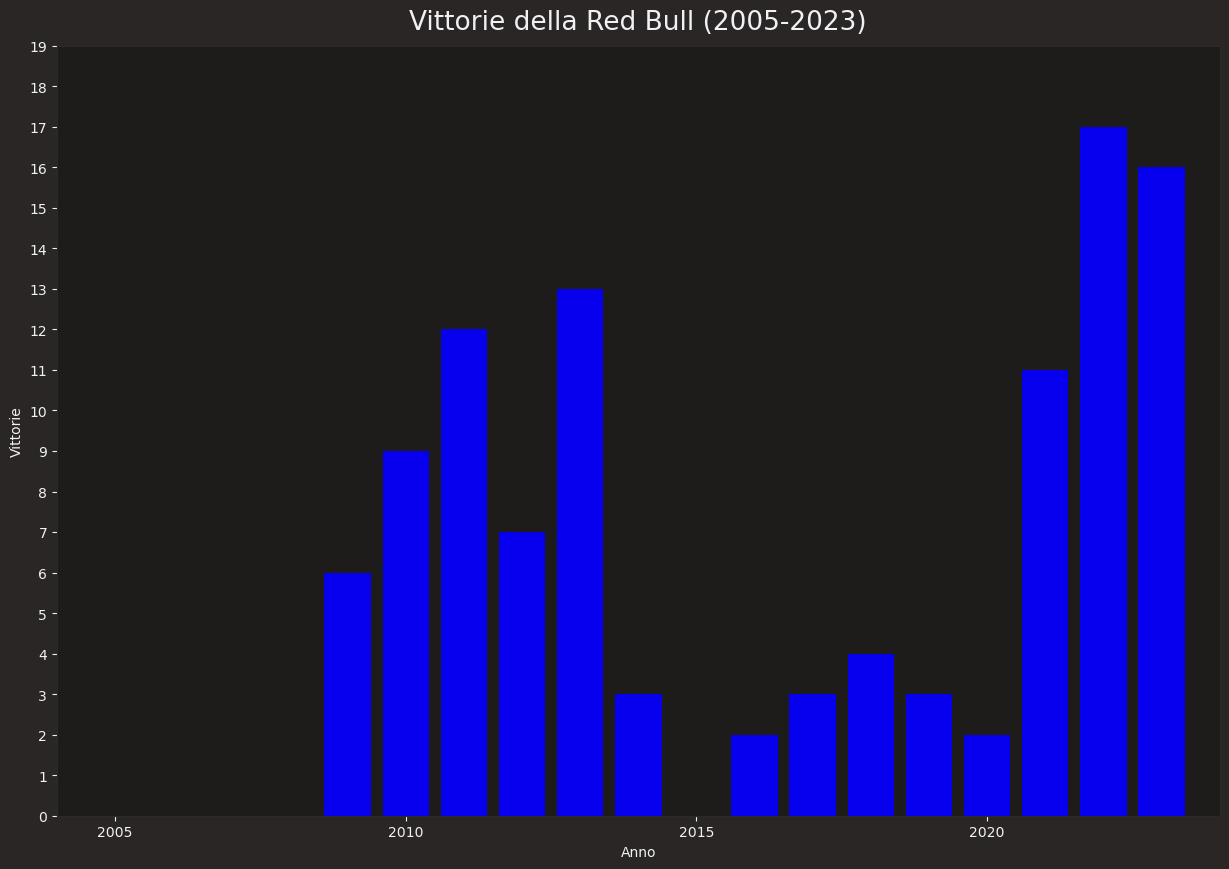

In [10]:
idTeam = 9 # Red Bull
rbr_wins = results[(results['constructorId'] == idTeam) & (results['positionOrder'] == 1)].merge(races, on = 'raceId')

# Calcola il conteggio delle vittorie per ogni anno
rbr_win_count = rbr_wins['year'].value_counts().reset_index()
rbr_win_count.columns = ['year', 'wins']

# Crea un DataFrame con tutti gli anni dal 1950 al 2023
rbr_all_years = pd.DataFrame({'year': range(2005, 2024)})

# Fai il merge per assicurarti di avere tutte le etichette degli anni
rbr_win_count = rbr_all_years.merge(rbr_win_count, on='year', how='left')

# Riempi i valori mancanti (quelli con 0 vittorie) con 0
rbr_win_count['wins'].fillna(0, inplace=True)

# Ora puoi creare il grafico
plt.bar(rbr_win_count['year'], rbr_win_count['wins'], color = f1p.team_color('Rbr'))
plt.xlabel('Anno')
plt.ylabel('Vittorie')
plt.xlim(2004, 2024)
plt.xticks(np.arange(2005, 2024, step=5))
plt.yticks(np.arange(0, 20, step=1))
plt.title('Vittorie della Red Bull (2005-2023)')
plt.show()

### Com'è messa la distribuzione delle vittorie dei primi 5 team?

C:\Users\Simone\AppData\Local\Temp\ipykernel_5196\3458572385.py:14: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mer_win_count['wins'][:1954-1953+1].append(mer_win_count['wins'][2010-2023-1:]),


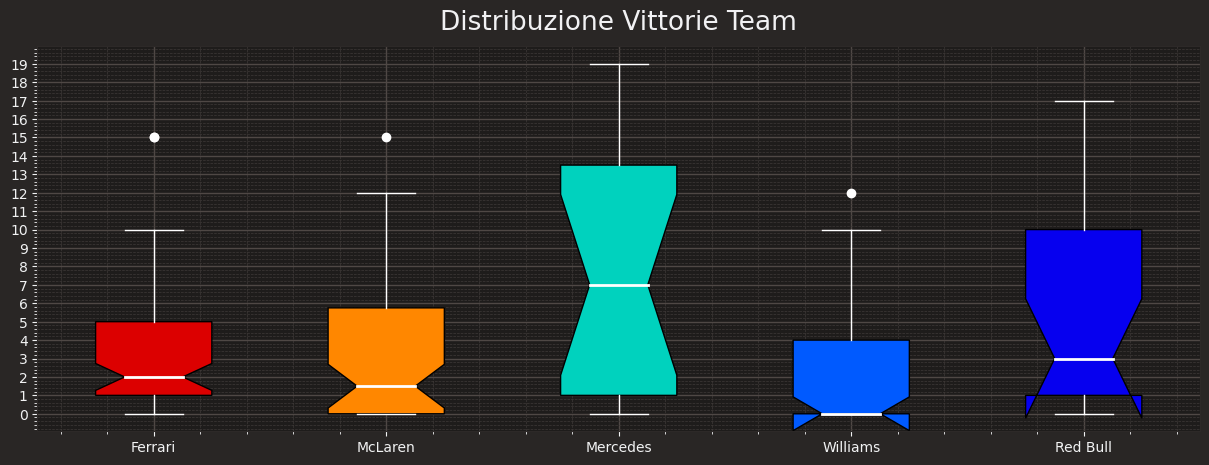

0.0


In [51]:
# I colori dei team
colors = {
    'Ferrari': f1p.team_color('Ferrari'),
    'McLaren': f1p.team_color('McLaren'),
    'Mercedes': f1p.team_color('Mercedes'),
    'Williams': f1p.team_color('Williams'),
    'Red Bull': f1p.team_color('Red Bull')
}

# Dati dei boxplot
boxplot = [
    fer_win_count['wins'],
    mcl_win_count['wins'],
    mer_win_count['wins'][:1954-1953+1].append(mer_win_count['wins'][2010-2023-1:]),
    wil_win_count['wins'],
    rbr_win_count['wins']
]

# Etichette dei team
labels = [
    'Ferrari',
    'McLaren',
    'Mercedes',
    'Williams',
    'Red Bull'
]

fig, ax = plt.subplots(figsize=(15, 5))

# Creazione dei boxplot
bplot = ax.boxplot(boxplot, patch_artist=True, notch=True)

# Colore dei boxplot
for patch, color in zip(bplot['boxes'], [colors[label] for label in labels]):
    patch.set_facecolor(color)

# Stanghette bianche
for median in bplot['medians']:
    median.set_color('white')
    median.set_linewidth(2)    

# Outliers bianchi
for flier in bplot['fliers']:
    flier.set(marker='o', color='white', markerfacecolor='white', markeredgecolor='white')

# Bastoncini bianchi
for whisker in bplot['whiskers']:
    whisker.set(color='white')

# Range interquartile bianco
for cap in bplot['caps']:
    cap.set(color='white')
    
# Etichette sugli assi x
ax.set_xticklabels(labels)
plt.yticks(np.arange(0, 20, step=1))

# Titolo del grafico
ax.set_title('Distribuzione Vittorie Team')

plt.show()

print(wil_win_count['wins'].median())